# Generate a simulation of a population by running envs_beta/BogoBetaEnv  environment

JMA 14 March 2023

See also `generate_primary_sim.py`

In [7]:
%load_ext autoreload
%autoreload 2
import math, os, re, sys
from pathlib import Path
import pandas as pd
import numpy as np

sys.path.append('../RL_offline/envs_beta')
from beta_policies import BogoPolicies

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
### Use this policy for test

MAX_DOSE = 0.7 
VERBOSE = 0
PATIENTS = 1000
# Moved to beta_policies.py
# def randomized_const_policy(yesterday, today):  # default policy
#     dose = BogoPolicies.my_rng.uniform(low=0, high=MAX_DOSE, size=1)[0]
#     if VERBOSE: print(f'chohort dose: {dose:.3}')
#     return dose
   

### a test run
def test_patient_run(env, policy):
    ''
    record_df = pd.DataFrame()
    for p in range(PATIENTS):
        # Create a patient with a random Id. 
        the_patient = BogoPolicies.my_rng.integers(low=0, high=100000, size=1)[0]
        observation, info = env.reset(id_serial= the_patient)
        print('\tpatient: ', the_patient)
        for _ in range(BogoPolicies.MAX_DAYS):
            observation, reward, terminated, info = env.step(policy)
            if VERBOSE == 2: 
                print(env.today)
            elif VERBOSE == 1:
                print(f'i: {info} # obs: {env.get_observation()}, R: {reward}, end? {terminated}' )
            else:
                pass
            if terminated:
                break
        episode_df, total_reward = env.close()
        print(f'reward {total_reward}')
        record_df = pd.concat([record_df, episode_df])
    return record_df

def run_stats(rdf):
    'Extract the dose-respose curve from the patient episodes'
    # For each patient run 
    print(rdf.groupby('patient_id').mean('dose'))
    
        


In [9]:
# All const policies test
bogo_env = BogoPolicies()
print(f'n cohorts {bogo_env.NUM_COHORTS}')
df = test_patient_run(bogo_env, bogo_env.dose_cohort_policy)
#df.to_csv('cohort_const.csv', header=True,  index=False)
print(run_stats(df))
print(f'DONE! - record cnt {df.shape[0]}')
    

n cohorts 16
	patient:  6343
Out-of-range severity:125.889 is high
reward -211
	patient:  45332
reward 87
	patient:  65512
Out-of-range severity:126.326 is high
reward -213
	patient:  6946
Out-of-range severity:141.279 is high
reward -212
	patient:  71016
Out-of-range severity:133.009 is high
reward -209
	patient:  51461
Out-of-range severity:134.76 is high
reward -215
	patient:  71405
Out-of-range severity:132.846 is high
reward -210
	patient:  86991
Out-of-range severity:129.237 is high
reward -211
	patient:  31987
Out-of-range severity:130.96 is high
reward -217
	patient:  592
Out-of-range severity:135.143 is high
Out-of-range severity:158.123 is high
reward -211
	patient:  89653
Out-of-range severity:135.963 is high
reward -212
	patient:  80074
reward -209
	patient:  85460
reward -218
	patient:  40927
Out-of-range severity:144.069 is high
reward -209
	patient:  15550
Out-of-range severity:130.882 is high
reward -210
	patient:  20918
Out-of-range severity:136.054 is high
reward -212

In [10]:

bogo_env = BogoPolicies()
print(f'n cohorts {bogo_env.NUM_COHORTS}')
df = test_patient_run(bogo_env, bogo_env.standard_of_care_policy)
df.to_csv('cnt_100_patients.csv', header=True,  index=False)
print(f'DONE! - record cnt {df.shape[0]}')
    

n cohorts 16
	patient:  63135
Out-of-range severity:144.512 is high
reward -212
	patient:  86137
Out-of-range severity:145.182 is high
reward -215
	patient:  86413
Out-of-range severity:140.567 is high
reward -213
	patient:  11176
Out-of-range severity:128.935 is high
Out-of-range severity:150.248 is high
reward -213
	patient:  1558
reward 90
	patient:  41198
reward -213
	patient:  56888
reward -212
	patient:  66828
Out-of-range severity:131.143 is high
Out-of-range severity:154.28 is high
reward -215
	patient:  42759
reward -211
	patient:  38764
Out-of-range severity:126.557 is high
Out-of-range severity:146.334 is high
Out-of-range severity:171.991 is high
reward -214
	patient:  36373
Out-of-range severity:125.66 is high
reward -214
	patient:  19265
Out-of-range severity:130.107 is high
reward -209
	patient:  20437
reward -210
	patient:  48260
reward -212
	patient:  17301
Out-of-range severity:128.372 is high
Out-of-range severity:150.038 is high
reward -213
	patient:  19678
Out-of-r

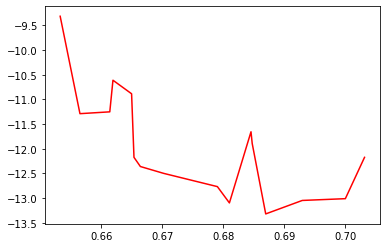

In [13]:
import matplotlib.pyplot as plt

xavg = df.groupby('cohort').mean()
xavg.sort_values('drug', inplace=True)
# xmax = df.groupby('cohort').max()
# xmin = df.groupby('cohort').min()

#plt.plot(xmax['drug'], xmax['reward'], color = 'black')
plt.plot(xavg['drug'], xavg['reward'], color = 'red')
# plt.plot(xmin['drug'], xmin['reward'], color = 'blue')